In [1]:
!pip install spacy
!pip install https://huggingface.co/turkish-nlp-suite/tr_core_news_trf/resolve/main/tr_core_news_trf-any-py3-none-any.whl
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.2/849.2 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.8 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.1
    Uninstalling 

In [2]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from spacy import displacy
from spacy import tokenizer
nlp= spacy.load('tr_core_news_trf')
import numpy as np
from PIL import Image

In [4]:
# Assign the filename to a variable
filename = 'piraye.txt'
# Make the text of the file available to our script
ner_text = open(filename).read()

# Create the Doc object by passing it through the text pipeline (nlp)
doc = nlp(ner_text)

for token in doc:
    print(token.text)
# print entities
ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents]
print(ents)
# now we use displaycy function on doc2
displacy.render(doc, style='ent', jupyter=True)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
de
,
senin
yüreğini
yakanların
içini
eritmeyesin
ki
?
"
 
 
Kapının
zil
sesiyle
bölünüyor
konuşmamız
.

   
"
Girebilir
miyim
?
"
diyor
Haşim
ürkek
bir
tavırla
.
 
 
Sonra
yanıtımı
beklemeden
,
salona
doğru
yürüyor
.
 
 
Karşılıklı
oturuyoruz
.
 
 
Son
gördüğümden
çok
farklı
bir
görünümde
Haşim
.
En
az
on
yaş
ihtiyarlamış
;
omuzları
 
çökmüş
;
yüzüne
karamsar
bir
ifade
gelmiş
oturmuş
.
 
 
"
Dayanamıyorum
Piraye
,
"
diye
orta
yerinden
giriyor
konuşmaya
.
"
Kaldıracağımın
çok
 
üzerinde
bir
yükün
altındayım
.
Yaşadıklarım
yetmezmiş
gibi
;
bir
de
bakıma
muhtaç
,
 
özürlü
bir
çocuğun
yükü
bindi
omuzlarıma
.
"
 
 
"
Çocuk
için
üzüldüm
,
"
diyorum
.
 
 
"
Senin
ahin
tuttu
!
"
 
 
"
Ben
ah
etmedim
ama
.
Hiçbir
günahı
olmayan
masumdan
ne
isteyebilirim
ki
?
"
 
 
"
Tanrı'nın
takdiri
belki
de
...
Adını
Kader
koyduk
.
Kaderin
bize
oynadığı
oyunun
ürünü
 
olarak
karşımda
duran
kızıma
daha
uygun
bir
ad
bulamadım
ne
yazık
ki
.
"
 
 
Halinden
etkilenmem

In [6]:
mask = np.array(Image.open('comment.png'))

kelimeler = ''

# iterate through the csv file
for val in ents:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    kelimeler += " ".join(tokens)+" " 
    #kelimeler += e.label_ = "PERSON"


print("Piraye kitabında bulunan toplam PERSON etiketli isimlerin sayısı: ", len([ent for ent in doc.ents if ent.label_ == 'PERSON']))
print("Piraye kitabında bulunan toplam GPE sayısı: ", len([ent for ent in doc.ents if ent.label_ == 'GPE']))
print("Piraye kitabında bulunan toplam ORG sayısı: ", len([ent for ent in doc.ents if ent.label_ == 'ORG']))
print("Piraye kitabında bulunan toplam DATE sayısı: ", len([ent for ent in doc.ents if ent.label_ == 'DATE']))
print("Piraye kitabında bulunan toplam TIME sayısı: ", len([ent for ent in doc.ents if ent.label_ == 'TIME']))

Piraye kitabında bulunan toplam PERSON etiketli isimlerin sayısı:  2261
Piraye kitabında bulunan toplam GPE sayısı:  459
Piraye kitabında bulunan toplam ORG sayısı:  28
Piraye kitabında bulunan toplam DATE sayısı:  74
Piraye kitabında bulunan toplam TIME sayısı:  38


Counter({'diyarbakır': 169, 'i̇stanbul': 125, 'çınarcık': 20, 'dicle': 19, 'i̇zmir': 13, 'reyyan': 7, 'adana': 7, 'çermik': 6, 'mardin': 6, 'safranbolu': 5, 'anadolu': 4, 'balıkesir': 4, 'yalova': 4, 'ofis': 3, 'piraye': 3, 'mersin': 3, 'urfa': 3, 'i̇skenderun': 3, 'arsuz': 3, 'nişantaşı': 2, '': 2, 'çardak': 2, 'levent': 2, 'mısır': 2, 'naran': 2, 'dağkapı': 2, 'şişli': 2, 'lamia': 2, 'boğsak': 2, 'ankara': 2, 'istanbul': 1, 'sultanahmet': 1, 'kadıköy': 1, 'yazköşkü': 1, 'gümüşçü': 1, 'bodrum': 1, 'marmaris': 1, 'sapanca': 1, 'erzurum': 1, 'silivri': 1, 'diyarbakır yenişehir': 1, 'ortadoğu': 1, 'ayişe': 1, 'eski diyarbakır': 1, 'dörtyol': 1, 'haşim': 1, 'yenişehir': 1, 'antep': 1, 'antalya': 1, 'bursa': 1, 'elazığ': 1, 'gaziantep': 1, 'anamur': 1, 'karadeniz': 1, 'kayseri': 1, 'malatya': 1, 'konak': 1, 'bismil': 1, 'şehriban': 1, 'seyrantepe': 1})


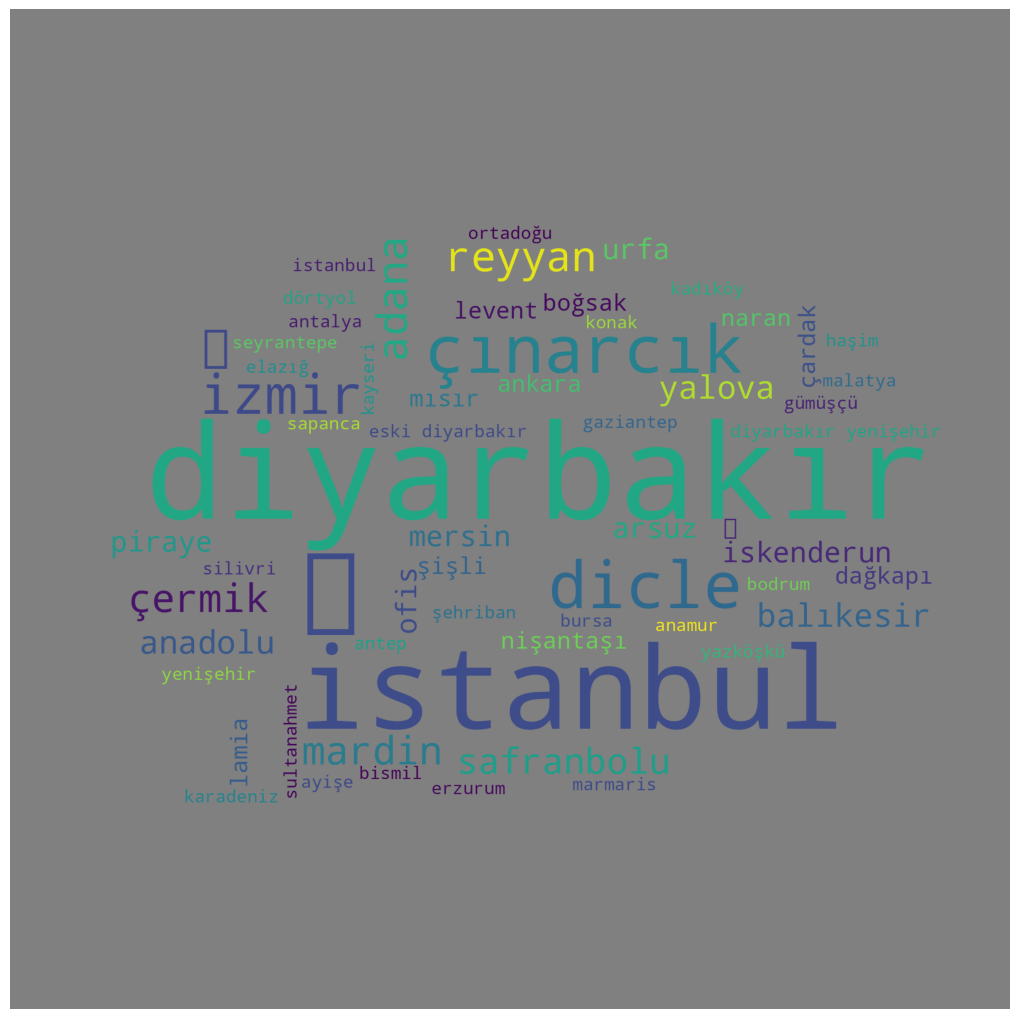

In [7]:
mask = np.array(Image.open('comment.png'))
GPE_word_counts = Counter(ent.lemma_.lower() for ent in doc.ents if ent.label_ == "GPE" and not ent[0].is_stop and not ent[0].is_punct and not ent[0].is_space)

print(GPE_word_counts)

GPE_wordcloud = WordCloud(width=800, height=800,
                      background_color='grey',
                    stopwords=set(STOPWORDS),
                    mask = mask,
                     min_font_size=10).generate_from_frequencies(GPE_word_counts)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(GPE_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

Counter({'haşim': 653, 'lamia': 192, 'ömer': 184, 'piraye': 136, 'esin': 126, 'şehriban': 111, 'arif': 62, 'kenan': 60, 'dicle': 43, 'turan': 39, 'naran': 39, 'reyyan': 35, 'nurgül': 31, 'korhan': 26, 'sibel': 25, 'anne': 23, 'nevzat': 23, 'ümran': 22, 'ayişe': 21, 'volkan': 20, 'ayten': 18, 'serap': 17, 'latife': 14, 'baba': 12, 'artukoğlu': 12, 'emir': 12, 'nâzım hikmet': 11, 'göksel': 11, 'gökçe': 10, 'mehmet': 10, 'enişte': 7, '': 7, 'ali': 7, 'baran': 7, 'yılmaz': 7, 'hatice': 6, 'müjde': 6, 'selami': 6, 'halit': 6, 'cevdet': 6, 'ahmet': 5, 'kevser': 5, 'berfo': 5, 'fikret': 4, 'nusret': 4, 'artukoğlu aile': 4, 'atatürk': 4, 'ümmü': 4, 'bekir': 4, 'nâzı hikmet': 3, 'ahmed arif': 3, 'işıl': 3, 'halil': 3, 'çermik': 3, 'burçin': 3, 'erhan': 3, 'i̇brahim': 3, 'yahya': 3, 'lamia naran': 3, 'ercan': 3, 'hesna': 3, 'zühre': 3, 'arife': 2, 'aysel': 2, 'çınarcık': 2, 'lüsyen': 2, 'nevin': 2, 'anne baba': 2, 'yenge': 2, 'görümce': 2, 'burak': 2, 'latife halit': 2, 'funda': 2, 'hızır': 2, '

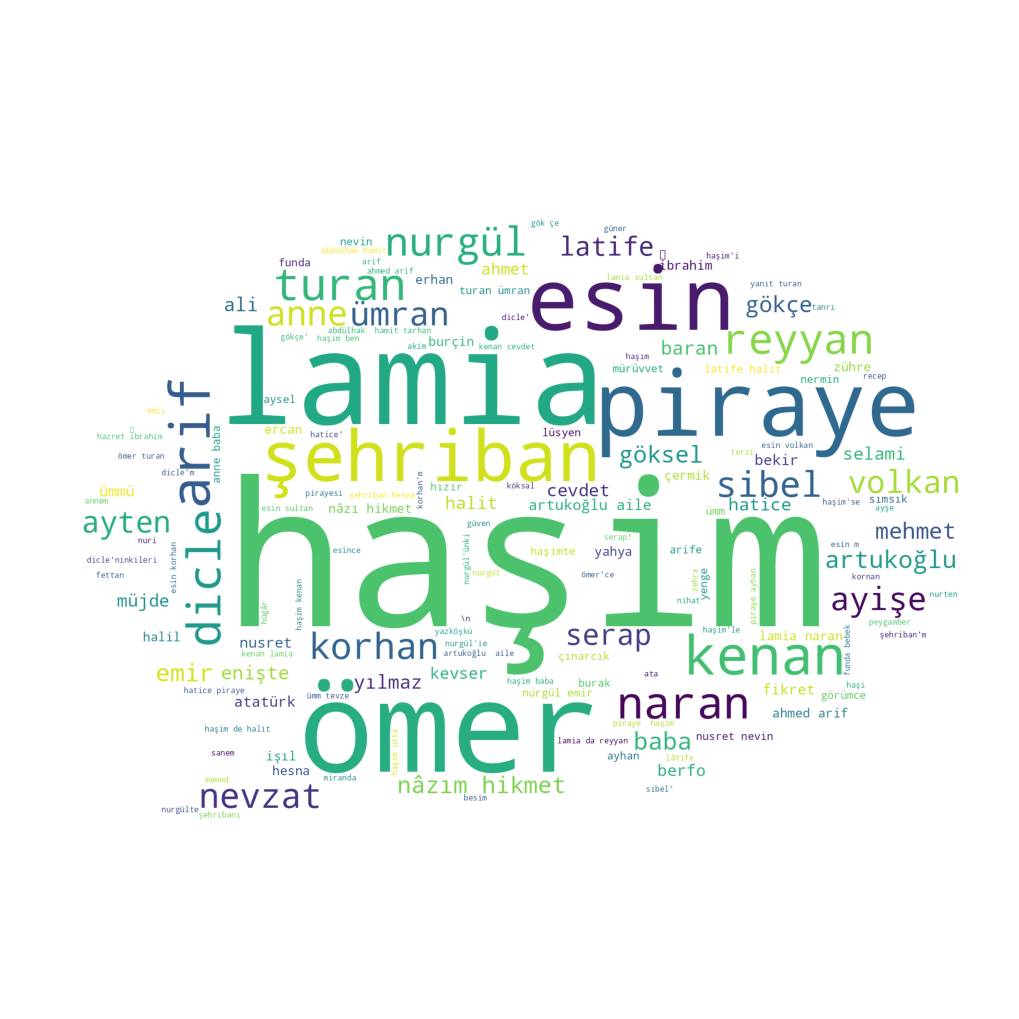

In [8]:
mask = np.array(Image.open('comment.png'))

person_word_counts = Counter(ent.lemma_.lower() for ent in doc.ents if ent.label_ == "PERSON" and not ent[0].is_stop and not ent[0].is_punct and not ent[0].is_space)

print(person_word_counts)

person_wordcloud = WordCloud(width=800, height=800,
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    mask=mask,
                    min_font_size=10).generate_from_frequencies(person_word_counts)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(person_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

Counter({'pazartesi sabah': 4, 'cumartesi akşam': 4, 'bir ay': 4, 'hafta son': 4, 'cuma akşam': 3, 'bir hafta': 3, 'temmuz baş': 3, 'eylül': 2, 'cumartesi sabah': 2, 'altı ay': 2, 'bir haftalık': 2, 'hafta baş': 2, 'üç gün': 1, 'üç gece': 1, 'mayıs': 1, 'pazartesi ve salı gün': 1, 'salı akşam': 1, '': 1, 'perşembe sabah': 1, 'pazar gün': 1, 'pazartesi gün': 1, 'hafta iç': 1, 'aralık  ocak': 1, 'bin yıl': 1, 'ağustos ilk cumartesi': 1, 'hafta iki gün': 1, 'bir hafta  sonra': 1, 'on sekiz ay': 1, 'üç ay': 1, 'iki yıl': 1, 'iki gün sonra': 1, 'bir hafta  önce': 1, 'bir aylık': 1, 'üç aylık': 1, 'yüz yıl': 1, 'yüzyıl önce': 1, 'bir yıl sonra': 1, 'bir yıl': 1, 'bir ay sonra': 1, 'altı ay sonra': 1, 'otuz yıl': 1, 'dün öğlen bu yan': 1, 'haziran baş': 1, 'ertesi pazar': 1, 'iki hafta önce': 1, 'yaz ay': 1, 'bir ay sonunda': 1, 'iki haftalık': 1, 'bir saat sonra': 1})


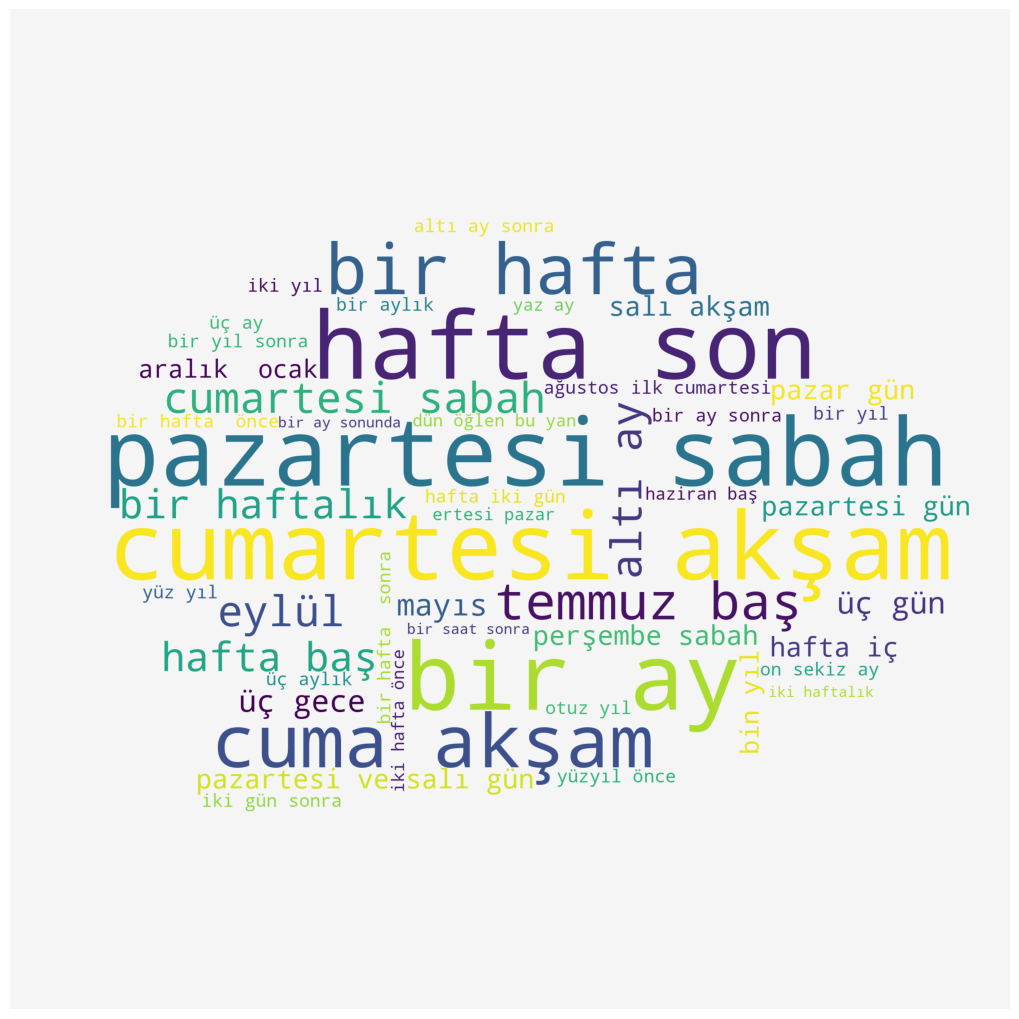

In [9]:
mask = np.array(Image.open('comment.png'))
date_word_counts = Counter(ent.lemma_.lower() for ent in doc.ents if ent.label_ == "DATE" and not ent[0].is_stop and not ent[0].is_punct and not ent[0].is_space)

print(date_word_counts)

date_wordcloud = WordCloud(width=800, height=800,
                      background_color='#f5f5f5',
                    stopwords=set(STOPWORDS),
                    mask=mask,
                     min_font_size=10).generate_from_frequencies(date_word_counts)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(date_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

Counter({'bir saat': 5, 'iki saat': 2, 'beş dakika': 2, 'on iki': 2, 'on dakika': 2, 'iki ay': 2, 'bir dakika': 2, 'beş yıllık': 1, 'iki yıllık': 1, 'saat tam': 1, 'saat kaç': 1, '': 1, 'üç aylık': 1, 'iki,': 1, 'bir': 1, 'bir on': 1, 'iki': 1, 'on gün': 1, 'üç': 1, 'on beş gün kal': 1, 'üç dakika': 1, 'üç yıllık': 1, 'altı ay': 1, 'iki aylık': 1, 'üç saat': 1, 'otuz yıl': 1})


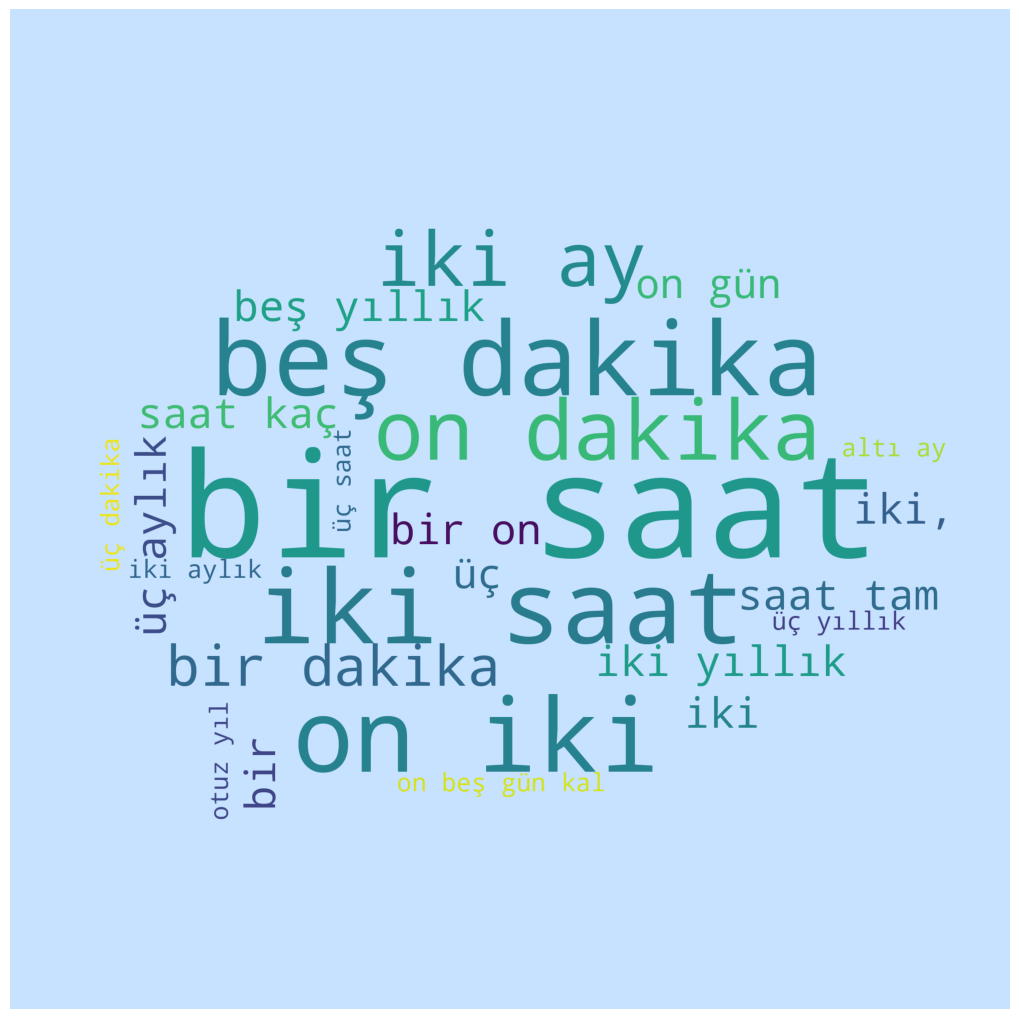

In [10]:
mask = np.array(Image.open('comment.png'))
time_word_counts = Counter(ent.lemma_.lower() for ent in doc.ents if ent.label_ == "TIME" and not ent[0].is_stop and not ent[0].is_punct and not ent[0].is_space)

print(time_word_counts)

time_wordcloud = WordCloud(width=800, height=800,
                      background_color='#c6e2ff',
                    stopwords=set(STOPWORDS),
                    mask=mask,
                     min_font_size=10).generate_from_frequencies(time_word_counts)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(time_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 